In [1]:
import pickle
import pandas as pd
import re

In [2]:
with open('../data/interim/ham_train.pkl', 'rb') as f:
    ham_train = pickle.load(f)

In [3]:
with open('../data/interim/spam_train.pkl', 'rb') as f:
    spam_train = pickle.load(f)

In [4]:
print(len(ham_train))
print(len(spam_train))

2491
1091


In [5]:
with open('../data/interim/ham_val.pkl', 'rb') as f:
    ham_val = pickle.load(f)
with open('../data/interim/ham_test.pkl', 'rb') as f:
    ham_test = pickle.load(f)
with open('../data/interim/spam_val.pkl', 'rb') as f:
    spam_val = pickle.load(f)
with open('../data/interim/spam_test.pkl', 'rb') as f:
    spam_test = pickle.load(f)

In [6]:
print(len(ham_val))
print(len(ham_test))
print(len(spam_val))
print(len(spam_test))

831
831
364
364


Let's take a look at a ham email and a spam email.

In [7]:
print(ham_train[0])

From rpm-list-admin@freshrpms.net  Tue Aug  6 11:13:22 2002
Return-Path: <rpm-zzzlist-admin@freshrpms.net>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 328174412A
	for <jm@localhost>; Tue,  6 Aug 2002 06:09:09 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Tue, 06 Aug 2002 11:09:09 +0100 (IST)
Received: from egwn.net (ns2.egwn.net [193.172.5.4]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g73HeEv21552 for
    <jm-rpm@jmason.org>; Sat, 3 Aug 2002 18:40:14 +0100
Received: from auth02.nl.egwn.net (localhost [127.0.0.1]) by egwn.net
    (8.11.6/8.11.6/EGWN) with ESMTP id g73HW2J23725; Sat, 3 Aug 2002 19:32:03
    +0200
Received: from gateway.gestalt.entity.net
    (host217-39-70-155.in-addr.btopenworld.com [217.39.70.155]) by egwn.net
    (8.11.6/8.11.6/EGWN) with ESMTP id g73HVnJ23693 for
    <rpm-list

In [8]:
print(spam_train[0])

From ilug-admin@linux.ie  Tue Aug  6 11:51:02 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 9E1F5441DD
	for <jm@localhost>; Tue,  6 Aug 2002 06:48:09 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Tue, 06 Aug 2002 11:48:09 +0100 (IST)
Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g72LqWv13294 for
    <jm-ilug@jmason.org>; Fri, 2 Aug 2002 22:52:32 +0100
Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org
    (8.9.3/8.9.3) with ESMTP id WAA31224; Fri, 2 Aug 2002 22:50:17 +0100
Received: from bettyjagessar.com (w142.z064000057.nyc-ny.dsl.cnc.net
    [64.0.57.142]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id WAA31201 for
    <ilug@linux.ie>; Fri, 2 Aug 2002 22:50:11 +0100
X-Auth

Let's clean up the emails, then have another look.

In [9]:
def clean1(email):
    pat = re.compile(r'([-\w]+: .+|<.*|.*>|.*NextPart.*|charset=.*|\w+\.\w+\.?\w*\.?\w*\.?\w*)')
    return pat.sub(' ', email)


def get_words(email, exclude_below=2):
    return [x.lower()
            for x in re.findall(r'[A-Za-z]+', email)
            if len(x) > exclude_below]

In [10]:
print(clean1(ham_train[0]))

From rpm-list-admin@   Tue Aug  6 11:13:22 2002
 
 
 
	by   (Postfix) with ESMTP id 328174412A
 ; Tue,  6 Aug 2002 06:09:09 -0400 (EDT)
 
	by localhost with IMAP (fetchmail- )
	for jm@localhost (single-drop); Tue, 06 Aug 2002 11:09:09 +0100 (IST)
 
      ( / ) with ESMTP id g73HeEv21552 for
 ; Sat, 3 Aug 2002 18:40:14 +0100
 
    ( / /EGWN) with ESMTP id g73HW2J23725; Sat, 3 Aug 2002 19:32:03
    +0200
 
    (host217-39-70- -  [ ]) by  
    ( / /EGWN) with ESMTP id g73HVnJ23693 for
 ; Sat, 3 Aug 2002 19:31:49 +0200
 
    [ ]) by   ( / ) with ESMTP
 ; Sat, 3 Aug 2002 18:35:19
    +0100
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

Hiya folks,

I'm currently running RawHide, since I had the brilliant idea that, by
using APT, it might actually be practical to keep up with the
developments.

However, APT seems to want a recompile - its sometimes leaving the RPM
database in need of a db_recover - and gcc   seems to require a closer
adherence to the standard than the C++ in APT was writ

Our cleaning function isn't working perfectly... we could use a built in module.

In [11]:
import email
import email.policy

def clean2(email_):
    msg = email.parser.Parser(policy=email.policy.default).parsestr(email_)
    return msg.get_content()

In [12]:
msg = clean2(ham_train[0])

In [13]:
print(msg)

Hiya folks,

I'm currently running RawHide, since I had the brilliant idea that, by
using APT, it might actually be practical to keep up with the
developments.

However, APT seems to want a recompile - its sometimes leaving the RPM
database in need of a db_recover - and gcc 3.2 seems to require a closer
adherence to the standard than the C++ in APT was written for.

This is a bit of a bummer.

Does anyone know if there's a latest version I could try which might
work, or whether I should simply do the porting myself? (I've made a
start, but there's a fair amount of work to do.)

If this works out, I might start a repository for the freshrpms compiled
on vLatest RawHide, for my own purposes and anyone else who's
interested.

Dave.



_______________________________________________
RPM-List mailing list <RPM-List@freshrpms.net>
http://lists.freshrpms.net/mailman/listinfo/rpm-list





This works better, but some messages are "multi-part", and we can't use `get_content()` with them, so it will fail on some emails.

Looking at the two samples above, we see that the first line is "From ...", then there are several lines with an attribute, followed by a colon, followed by some details. Let's capture these.

In [14]:
ham_train[0]

"From rpm-list-admin@freshrpms.net  Tue Aug  6 11:13:22 2002\nReturn-Path: <rpm-zzzlist-admin@freshrpms.net>\nDelivered-To: yyyy@localhost.netnoteinc.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 328174412A\n\tfor <jm@localhost>; Tue,  6 Aug 2002 06:09:09 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Tue, 06 Aug 2002 11:09:09 +0100 (IST)\nReceived: from egwn.net (ns2.egwn.net [193.172.5.4]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g73HeEv21552 for\n    <jm-rpm@jmason.org>; Sat, 3 Aug 2002 18:40:14 +0100\nReceived: from auth02.nl.egwn.net (localhost [127.0.0.1]) by egwn.net\n    (8.11.6/8.11.6/EGWN) with ESMTP id g73HW2J23725; Sat, 3 Aug 2002 19:32:03\n    +0200\nReceived: from gateway.gestalt.entity.net\n    (host217-39-70-155.in-addr.btopenworld.com [217.39.70.155]) by egwn.net\n    (8.11.6/8.11.6/EGWN) with ESMTP id g73HVnJ2

In [15]:
pat_from = re.compile(r'(From)\s+([-@\w\.]+)\s+([a-zA-Z0-9: ]+)')

In [16]:
re.search(pat_from, ham_train[0]).groups()

('From', 'rpm-list-admin@freshrpms.net', 'Tue Aug  6 11:13:22 2002')

The "received" parts span multiple lines, so they will be more difficult to extract.

Let's try to get this info using the email module.

In [17]:
msg = email.message_from_string(ham_train[0], policy=email.policy.default)

In [18]:
msg.is_multipart()

False

In [19]:
for header, value in msg.items():
    print(header, ":", value)

Return-Path : <rpm-zzzlist-admin@freshrpms.net>
Delivered-To : yyyy@localhost.netnoteinc.com
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 328174412A	for <jm@localhost>; Tue,  6 Aug 2002 06:09:09 -0400 (EDT)
Received : from phobos [127.0.0.1]	by localhost with IMAP (fetchmail-5.9.0)	for jm@localhost (single-drop); Tue, 06 Aug 2002 11:09:09 +0100 (IST)
Received : from egwn.net (ns2.egwn.net [193.172.5.4]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g73HeEv21552 for    <jm-rpm@jmason.org>; Sat, 3 Aug 2002 18:40:14 +0100
Received : from auth02.nl.egwn.net (localhost [127.0.0.1]) by egwn.net    (8.11.6/8.11.6/EGWN) with ESMTP id g73HW2J23725; Sat, 3 Aug 2002 19:32:03    +0200
Received : from gateway.gestalt.entity.net    (host217-39-70-155.in-addr.btopenworld.com [217.39.70.155]) by egwn.net    (8.11.6/8.11.6/EGWN) with ESMTP id g73HVnJ23693 for    <rpm-list@freshrpms.net>; Sat, 3 Aug 2002 19:31:49 +0200
Received : from 

So we can get all of these headers using the `email` module.

In [20]:
msg.get_content_type()

'text/plain'

In [21]:
for mail in ham_train:
    if email.message_from_string(mail, policy=email.policy.default).is_multipart():
        multimail = mail
        break

In [22]:
multimail

'Return-Path: <replies@oracleeblast.com>\nReceived: (qmail 19678 invoked by alias); 10 Jul 2002 13:22:47 -0000\nReceived: (qmail 19416 invoked by uid 82); 10 Jul 2002 13:22:42 -0000\nReceived: from replies@oracleeblast.com by mailhost with qmail-scanner-1.00 (uvscan: v4.1.40/v4210. . Clean. Processed in 8.59332 secs); 10 Jul 2002 13:22:42 -0000\nReceived: from inet-mail6.oracle.com (209.246.10.170)\n  by mi-1.rz.ruhr-uni-bochum.de with SMTP; 10 Jul 2002 13:22:30 -0000\nReceived: from blaster-smtp.oracle.com (eblast01.oracleeblast.com [148.87.9.11])\n\tby inet-mail6.oracle.com (Switch-2.2.2/Switch-2.2.0) with ESMTP id g6ADMHs25188\n\tfor XXXXXX.YYYYY@RUHR-UNI-BOCHUM.DE; Wed, 10 Jul 2002 06:22:17 -0700 (PDT)\nDate: Wed, 10 Jul 2002 06:22:17 -0700 (PDT)\nMessage-Id: <200207101322.g6ADMHs25188@inet-mail6.oracle.com>\nSubject: Oracle Technology Network TechBlast - July 2002\nFrom: Oracle Technology Network<replies@oracleeblast.com>\nTo: XXXXXX.YYYYY@RUHR-UNI-BOCHUM.DE\nReply-To: replies@ora

In [23]:
multimsg = email.message_from_string(multimail, policy=email.policy.default)

In [24]:
for part in multimsg.walk():
    ctype = part.get_content_type()
    print(ctype)
    if 'multipart' not in ctype:
        print(part.get_content())

multipart/alternative
text/plain


e
e
ssage
Content-type: text/plain; charset=iso-8859-1



text/html

<body bgcolor="#FFFFFF" link="#000000" vlink="#000000">
<a href="http://otn.oracle.com/index.html" target="_top"><img src="http://otn.oracle.com/otn300x65.gif" width=300 height=65 border=0 alt="Oracle Technology Network" hspace=5 vspace=5></a> 
<div align="center"><font face="Arial, Helvetica, sans-serif"><b><font size="+2">OTN 
  TechBlast </font><font size="+1"><br>
  </font> <i>July 2002 Issue</i></b><font size="2"><br>
  <font size="1">The monthly TechBlast is also available through the <a href="http://otn.oracle.com/techblast/index.htm">Oracle 
  Technology Network</a> website.</font></font></font> <br>
  <div align="left"> 
    <hr>
  </div>
</div>
<table width="100%" border="0" cellspacing="10" >
  <tr> 
    <td valign="top" width="14%" ><font size="2" face="Arial, Helvetica, sans-serif"><b>In 
      this issue:</b></font> 
      <table width="100%" border="0" cellspacing="2" 

In [25]:
import sys
sys.path.append('../src/features/')
import build_features as bf

In [26]:
corpus = bf.create_corpus(lambda x: bf.get_words(bf.clean2(x)), ham_train + spam_train)

In [27]:
word_freq = pd.Series(corpus).sort_values(ascending=False)

<AxesSubplot:>

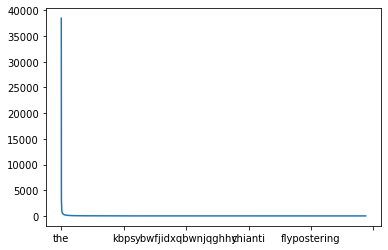

In [28]:
word_freq.plot()

In [29]:
filt = word_freq.between(6, 2000)

<AxesSubplot:>

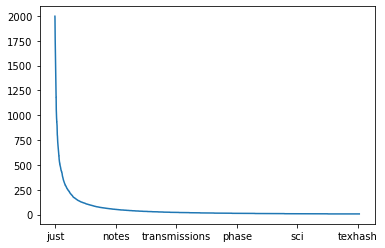

In [30]:
word_freq[filt].plot()

In [31]:
len(word_freq)

48750

In [32]:
len(word_freq[filt])

10039

In [33]:
X_train = bf.create_df(ham_train + spam_train, corpus, lower=6, upper=2000)

In [34]:
y_train = pd.Series([0] * len(ham_train) + [1] * len(spam_train))

In [35]:
X_train.head()

,just,there,what,here,new,now,time,mail,use,only,...,lappend,cart,licences,treating,explosive,eba,jukka,regulated,ffe,avid
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train.shape

(3582, 10039)

In [37]:
import numpy as np

In [38]:
rng = np.random.default_rng(seed=42)
shuf = rng.permutation(np.arange(0, X_train.shape[0]))

In [39]:
shuf

array([ 365, 2646,  974, ..., 1633, 3021, 1672])

In [40]:
X_train = X_train.iloc[shuf].reset_index(drop=True)
y_train = y_train[shuf].reset_index(drop=True)

In [41]:
X_val = bf.create_df(ham_val + spam_val, corpus, lower=6, upper=2000)
y_val = pd.Series([0] * len(ham_val) + [1] * len(spam_val))

In [42]:
rng = np.random.default_rng(seed=42)
shuf = rng.permutation(np.arange(0, X_val.shape[0]))

In [43]:
X_val = X_val.iloc[shuf].reset_index(drop=True)
y_val = y_val[shuf].reset_index(drop=True)

Let's train a quick model as a sanity check.

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf = LogisticRegression(C=0.3).fit(X_train, y_train)

In [46]:
print("Train score:", clf.score(X_train, y_train))
print("Val score:", clf.score(X_val, y_val))

Train score: 0.998324958123953
Val score: 0.9807531380753138


Not bad. We might be overfitting slightly. Seems similar to previous results.

Let's try L1 regularization to extract feature importances.

In [47]:
clf2 = LogisticRegression(penalty='l1', solver='liblinear', C=0.3).fit(X_train, y_train)

In [48]:
print("Train score:", clf2.score(X_train, y_train))
print("Val score:", clf2.score(X_val, y_val))

Train score: 0.9723618090452262
Val score: 0.9698744769874477


In [49]:
feature_importance = pd.Series(index=X_train.columns, data=clf2.coef_[0])
feature_importance.sort_values(inplace=True, ascending=False)

In [50]:
sum(feature_importance != 0.0)

179

So only 131 words are needed to get 96% accuracy (with C=0.15).

Let's look at what words indicate spam, and which indicate ham.

In [51]:
filt = feature_importance.gt(0.0)
feature_importance[filt][:50]

sightings      2.670727
click          1.473708
guaranteed     1.182943
marketing      1.154995
reply          1.074679
offer          1.070102
please         1.025049
credit         1.005730
removed        0.989998
remove         0.972045
money          0.964491
receive        0.942101
investment     0.832899
visit          0.780994
business       0.750523
sites          0.672106
name           0.637962
opportunity    0.637482
below          0.609361
opt            0.577942
website        0.553165
mortgage       0.542755
paid           0.518498
yourself       0.505278
risk           0.471981
low            0.434206
payment        0.425213
here           0.419099
life           0.412356
come           0.410781
within         0.385239
huge           0.384515
dear           0.373139
united         0.364297
dollars        0.361267
fax            0.359512
increase       0.348439
company        0.346698
min            0.340505
search         0.339765
days           0.326467
these          0

In [52]:
feature_importance[filt][50:100]

site          0.227072
less          0.202347
need          0.190577
hours         0.184703
offers        0.180233
adult         0.167590
access        0.144379
price         0.140686
removal       0.129745
internet      0.128863
kept          0.121775
request       0.118275
yours         0.104775
interested    0.096805
loss          0.060019
allow         0.053532
top           0.052203
form          0.038157
most          0.023167
special       0.020723
prices        0.019292
mailings      0.019192
web           0.015607
rate          0.003537
dtype: float64

In [53]:
filt = feature_importance.lt(0.0)
feature_importance[filt][:50]

last             -0.004702
reserved         -0.011948
seem             -0.014133
great            -0.014622
listinfo         -0.017088
changes          -0.035615
subscription     -0.035712
communications   -0.037103
issue            -0.038095
off              -0.040116
rights           -0.041796
open             -0.050080
comments         -0.052115
same             -0.054442
say              -0.055542
use              -0.065755
better           -0.070553
user             -0.078809
particular       -0.088655
via              -0.093035
either           -0.098588
think            -0.112499
things           -0.117550
https            -0.122535
those            -0.123785
executive        -0.126361
thanks           -0.126524
between          -0.149983
first            -0.152340
using            -0.160495
another          -0.162606
group            -0.163746
local            -0.166220
running          -0.167791
august           -0.176346
should           -0.176430
store            -0.178996
t

In [54]:
feature_importance[filt][50:100]

files         -0.243085
hardware      -0.253205
log           -0.253545
old           -0.258296
docs          -0.259866
could         -0.264196
too           -0.267246
don           -0.272921
networks      -0.276188
when          -0.276660
lines         -0.279529
unsubscribe   -0.300983
rpm           -0.315981
evil          -0.319291
got           -0.349571
razor         -0.368682
try           -0.372853
asp           -0.375014
might         -0.384656
server        -0.385852
were          -0.386670
original      -0.394979
groups        -0.409022
message       -0.440651
two           -0.455930
file          -0.465398
spam          -0.494279
something     -0.519142
news          -0.549949
what          -0.562098
there         -0.564522
messages      -0.600594
gary          -0.607726
run           -0.623687
doesn         -0.647778
users         -0.649978
said          -0.661597
september     -0.668151
seems         -0.671239
html          -0.759805
together      -0.773801
writes        -0

A few things to notice:
- the way we've extracted words chops up contractions; OTOH, contractions seem to indicate ham
- there are a lot of prepositions and pronouns, which I wouldn't think are important
- spam messages tend to use awkward/formal/impersonal prepositions and pronouns, like "yourself" and "within"
- somehow, 'gary' indicates ham; it would be better to have a feature "PROPER_NOUN" or "NAME"
- the phrase "spamassassin" indicates ham, which seems like it won't generalize well
- stemming might help, since "remove" and "removed" are both of roughly equal importance for detecting spam

Let's see how word frequency relates to these coefficients.

In [55]:
word_freq = pd.Series(corpus).sort_values(ascending=False)
filt = word_freq.between(6, 2000)

In [56]:
fi_wf = pd.DataFrame({"word_freq": word_freq[filt], 'feature_importance': pd.Series(index=X_train.columns, data=clf2.coef_[0])})

In [57]:
fi_wf.head()

,word_freq,feature_importance
just,1996,0.000000
there,1988,-0.564522
what,1979,-0.562098
here,1921,0.419099
new,1902,0.000000


In [58]:
import matplotlib.pyplot as plt

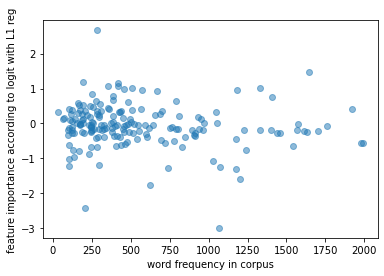

In [59]:
plt.figure()
filt = fi_wf['feature_importance'] != 0
plt.scatter(fi_wf[filt]['word_freq'], fi_wf[filt]['feature_importance'], alpha=0.5)
plt.xlabel("word frequency in corpus")
plt.ylabel("feature importance according to logit with L1 reg")
plt.show()

Word frequency and feature importance aren't correlated, but we can see that most of the import features (words) have frequency less that 1000.

What if we remove coefficients with small absolute value.

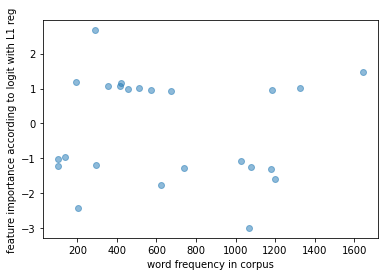

In [60]:
plt.figure()
filt = abs(fi_wf['feature_importance']) > 0.9
plt.scatter(fi_wf[filt]['word_freq'], fi_wf[filt]['feature_importance'], alpha=0.5)
plt.xlabel("word frequency in corpus")
plt.ylabel("feature importance according to logit with L1 reg")
plt.show()

The trend is less pronounced for features with weight outside of (-0.9, 0.9)

What are the highest weighted words?

In [61]:
filt = abs(fi_wf['feature_importance']) > 0.9
fi_wf[filt].sort_values(by='word_freq')

,word_freq,feature_importance
author,103,-1.030240
sponsor,104,-1.211092
subscribed,137,-0.950667
guaranteed,194,1.182943
newsisfree,205,-2.408607
sightings,287,2.670727
inc,295,-1.176387
reply,353,1.074679
offer,417,1.070102
marketing,419,1.154995


Next step: automate feature creation so that we can experiment with variations

## Testing build_features.py

Let's check how our BagOfWords class works

In [92]:
import importlib
importlib.reload(bf)

<module 'build_features' from '../src/features/build_features.py'>

In [77]:
from build_features import BagOfWords

In [63]:
bow = BagOfWords()
bow.fit(ham_train + spam_train)

In [64]:
X_train = bow.transform(ham_train + spam_train)

In [65]:
y_train = pd.Series([0] * len(ham_train) + [1] * len(spam_train))

In [66]:
X_val = bow.transform(ham_val + spam_val)

In [67]:
y_val = pd.Series([0] * len(ham_val) + [1] * len(spam_val))

In [68]:
rng = np.random.default_rng(seed=42)
shuf = rng.permutation(X_train.shape[0])

In [69]:
X_train = X_train.iloc[shuf].reset_index(drop=True)
y_train = y_train[shuf].reset_index(drop=True)

In [70]:
rng = np.random.default_rng(seed=42)
shuf = rng.permutation(X_val.shape[0])

In [71]:
X_val = X_val.iloc[shuf].reset_index(drop=True)
y_val = y_val[shuf].reset_index(drop=True)

In [72]:
X_train.shape

(3582, 0)

We didn't trim the corpus by word frequency, so our data has more features than before.

In [73]:
clf = LogisticRegression().fit(X_train, y_train)

print('Training score:', clf.score(X_train, y_train))
print("Validation score:", clf.score(X_val, y_val))

ValueError: at least one array or dtype is required

In [78]:
import random

def unzip(x):
    y, z = zip(*x)
    return list(y), list(z)

def get_raw_data(type='train', seed=42):
    INT_PATH = '../data/interim/'
    if type in ('train', 'val', 'test'):
        with open(INT_PATH + f'ham_{type}.pkl', 'rb') as f:
            ham = pickle.load(f)
        with open(INT_PATH + f'spam_{type}.pkl', 'rb') as f:
            spam = pickle.load(f)
        raw = [(x, 0) for x in ham] + [(x, 1) for x in spam]
        random.seed(seed)
        random.shuffle(raw)
        X, y = unzip(raw)
        return X, pd.Series(y)
    else:
        raise ValueError(f'Type "{type}" not recognized. Please enter "train", "val", or "test".')

In [79]:
get_raw_data('validation')

ValueError: Type "validation" not recognized. Please enter "train", "val", or "test".

In [80]:
X_train_raw, y_train = get_raw_data('train')

In [81]:
X_val_raw, y_val = get_raw_data('val')

In [82]:
X_train_raw[0]

'From fork-admin@xent.com  Fri Sep 20 16:15:28 2002\nReturn-Path: <fork-admin@xent.com>\nDelivered-To: yyyy@localhost.spamassassin.taint.org\nReceived: from localhost (jalapeno [127.0.0.1])\n\tby jmason.org (Postfix) with ESMTP id 2B7D716F03\n\tfor <jm@localhost>; Fri, 20 Sep 2002 16:15:27 +0100 (IST)\nReceived: from jalapeno [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Fri, 20 Sep 2002 16:15:27 +0100 (IST)\nReceived: from xent.com ([64.161.22.236]) by dogma.slashnull.org\n    (8.11.6/8.11.6) with ESMTP id g8KDVtC07056 for <jm@jmason.org>;\n    Fri, 20 Sep 2002 14:31:55 +0100\nReceived: from lair.xent.com (localhost [127.0.0.1]) by xent.com (Postfix)\n    with ESMTP id DE396294177; Fri, 20 Sep 2002 06:28:12 -0700 (PDT)\nDelivered-To: fork@spamassassin.taint.org\nReceived: from imo-d10.mx.aol.com (imo-d10.mx.aol.com [205.188.157.42]) by\n    xent.com (Postfix) with ESMTP id 6519529409C for <fork@xent.com>;\n    Fri, 20 Sep 2002 06:27:22 -070

In [83]:
bow = BagOfWords(high=0.2)

In [84]:
import email
import email.policy

In [85]:
bow.fit(X_train_raw)

In [86]:
X_train = bow.transform(X_train_raw)
X_val = bow.transform(X_val_raw)

In [87]:
X_train.shape

(3582, 48743)

In [91]:
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

print('Training score:', clf.score(X_train, y_train))
print("Validation score:", clf.score(X_val, y_val))

Training score: 0.9991624790619765
Validation score: 0.9815899581589959


We're fitting the training set almost exactly. I need to improve the high/low cut-offs for the bag of words.

Ideally, we would cache the raw corpus and word_freq, so that we don't need to re-fit to change the filters. I don't think stemming can be turned off without re-fitting.